<a href="https://colab.research.google.com/github/mobinapourmoshir/Functional-Deep-Learning/blob/main/Parallelizing_Neural_Network_Training_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 12: Parallelizing Neural Network Training with PyTorch
Machine Learning with PyTorch and Scikit-Learn: Develop Machine Learning and Deep Learning Models with Python Book by Liu Yuxi, Sebastian Raschka, and Vahid Mirjalili

Main Ideas of Chapter 12:
- How PyTorch improves training performance
- Working with PyTorch's Dataset and DataLoader to build input pipelines and enable efficient
model training
- Working with PyTorch to write optimized machine learning code
- Using the torch.nn module to implement common deep learning architectures conveniently
- Choosing activation functions for artificial NNs

https://docs.pytorch.org/docs/stable/index.html

### What is PyTorch?
There are some performance challenges like limitations of CPUs and some models need tuning huge number of parameters (e.g., MNIST required ~80,000 parameters) and the solution is using GPUs that act like small, massively parallel computer clusters. However, Programming GPUs directly (using CUDA or OpenCL) is complex and inconvenient. The goog news is PyTorch simplifies GPU-based machine learning by handling these low-level details.

PyTorch is a scalable, multiplatform framework for implementing and running machine learning and deep learning algorithms.
PyTorch tensors are like NumPy arrays, but support GPU acceleration and automatic differentiation.

Different types of tensor in PyTorch:

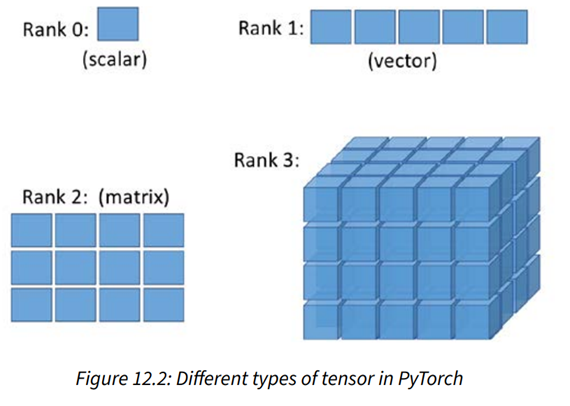

## Creating tensors in PyTorch

In [ ]:
import torch
import numpy as np
np.set_printoptions(precision=3) # How many decimal places are shown when printing NumPy arrays.
# Rank 1 tensors (vectors)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b) # Converts a NumPy array b into a PyTorch tensor t_b.
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [ ]:
# Rank 2 tensors (matrices)
t_ones = torch.ones(2, 3)
print(t_ones)
t_ones.shape

tensor([[1., 1., 1.],
        [1., 1., 1.]])


torch.Size([2, 3])

In [ ]:
# Creating a tensor of random values
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.9053, 0.6851, 0.2816],
        [0.6098, 0.5338, 0.5317]])


##Manipulating the data type and shape of a tensor

In [ ]:
t_a_new = t_a.to(torch.int64) # torch.to(): change the data type of a tensor to a desired type
print(t_a_new.dtype)

torch.int64


In [ ]:
# Transposing the shape of a tensor matrix
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [ ]:
# Reshaping a tensor (for example, from a 1D vector to a 2D array)
t = torch.rand(30) # A vector
t_reshape = t.reshape(5, 6) # A matrix
print(t_reshape)
print(t_reshape.shape)

tensor([[0.5846, 0.4272, 0.5167, 0.8192, 0.3211, 0.1602],
        [0.1323, 0.2516, 0.3372, 0.2990, 0.0882, 0.3748],
        [0.8989, 0.8644, 0.7881, 0.2492, 0.1251, 0.2194],
        [0.4284, 0.3457, 0.8724, 0.8868, 0.7353, 0.6301],
        [0.0559, 0.6860, 0.4911, 0.7620, 0.5675, 0.7225]])
torch.Size([5, 6])


In [ ]:
# Removing the unnecessary dimensions (dimensions that have size 1, which are not needed):
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


## Applying mathematical operations to tensors

In [ ]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
print("t1: ",t1)
t2 = torch.normal(mean=0, std=1, size=(5, 2))
print("t2: ",t2)

t1:  tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
t2:  tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [ ]:
t3 = torch.multiply(t1, t2) # element-wise product of t1 and t2
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [ ]:
#  To compute the mean, sum, and standard deviation along a certain axis (or axes) we can use: torch.mean(), torch.sum(), torch.std()
t4 = torch.mean(t1, axis=0) # Mean
print("Mean: \n", t4)
# matrix-matrix product between t1 and t2 (t1 * t2^T)
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print("product t1 * t2^T: \n",t5)
# t1^T * t2
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print("product t1^T * t2: \n",t6)

Mean: 
 tensor([-0.1373,  0.2028])
product t1 * t2^T: 
 tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
product t1^T * t2: 
 tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [ ]:
# computing the L^p norm of a tensor
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


## Split, stack, and concatenate tensors
In this subsection, we will cover PyTorch operations for splitting a tensor into multiple tensors, or  the reverse: stacking and concatenating multiple tensors into a single one.

- Splitting into two or more tensors: **torch.chunk()** which divides an input tensor into a list of equally sized tensors or we can provide the desired sizes in a list using the torch.split() function.

- Concatenating or stacking multiple tensors to create a single tensor: **torch.stack() and torch.cat()**

In [ ]:
### Splitting ###
# Providing the number of splits
torch.manual_seed(1)
t = torch.rand(6)
print("t: ",t)
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

t:  tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [ ]:
# Providing the sizes of different splits
torch.manual_seed(1)
t = torch.rand(5)
print("t: ",t)
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

t:  tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [ ]:
### concatenating or stacking ###
# Vectors
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [ ]:
# matrices
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


# Building input pipelines in PyTorch

When the dataset is too large to fit into the computer memory, we will need to load the data from the main storage device (for example, the hard drive or solid-state drive) in chunks, that is, batch by batch.

Also, we may need to construct a data-processing pipeline to apply certain transformations and preprocessing steps to our data, such as mean centering, scaling, or adding noise to augment the training procedure and to prevent overfitting.

## Creating a PyTorch DataLoader from existing tensors

In [ ]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32) # Creates a vector (1D tensor) from 0 to 6 (not including 6 itself)
data_loader = DataLoader(t)
for item in data_loader:
  print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


If we want to create batches from this dataset, with a desired batch size of 3, we can do this with the batch_size argument in DataLoader (that shuffels the batches) as follows:

In [ ]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
  print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Combining two tensors into a joint dataset
We may have the data in two (or possibly more) tensors. For example, we could have a tensor for features and a tensor for labels. In such cases, we need to build a dataset that combines these tensors, which will allow us to retrieve the elements of these tensors in tuples.

In [ ]:
# Example data
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

# Create a custom dataset class
from torch.utils.data import Dataset
class JointDataset(Dataset):# It inherits from PyTorch’s built-in Dataset class
  def __init__(self, x, y):
    # runs once when you create the dataset and It stores your data (x and y) inside the object.
    self.x = x
    self.y = y

  def __len__(self): # Returns the number of samples in the dataset.
    return len(self.x)

  def __getitem__(self, idx): # It tells PyTorch how to access one sample (both x and y) given an index idx.
    return self.x[idx], self.y[idx]


joint_dataset = JointDataset(t_x, t_y)
for example in joint_dataset:
  print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


## Shuffle, batch, epochs and repeat

You have already seen how to specify the batch size using the
batch_size argument of a DataLoader object. Now, in addition to creating batches, you will see how to shuffle and reiterate over the datasets. We will continue working with the previous joint dataset.


In [ ]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True) # each batch contains two data records (x) and the corresponding labels (y)
#  Tterating through the data loader entry by entry:
for i, batch in enumerate(data_loader, 1):
  print(f'batch {i}:', 'x:', batch[0],
        '\n        y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
        y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
        y: tensor([1, 3])


The rows are shuffled without losing the one-to-one correspondence between the entries in x and y. In addition, when training a model for multiple epochs, we need to shuffle and iterate over the dataset
by the desired number of epochs. So, let's iterate over the batched dataset twice:

In [ ]:
for epoch in range(2):
  print(f'epoch {epoch+1}')
  for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0],
          '\n          y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
          y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
          y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
          y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
          y: tensor([0, 1])


## Creating a dataset from files on your local storage disk



Image shape: (301, 401, 4)
Image shape: (299, 396, 4)
Image shape: (294, 242, 4)
Image shape: (262, 395, 4)
Image shape: (265, 392, 4)
Image shape: (295, 392, 4)


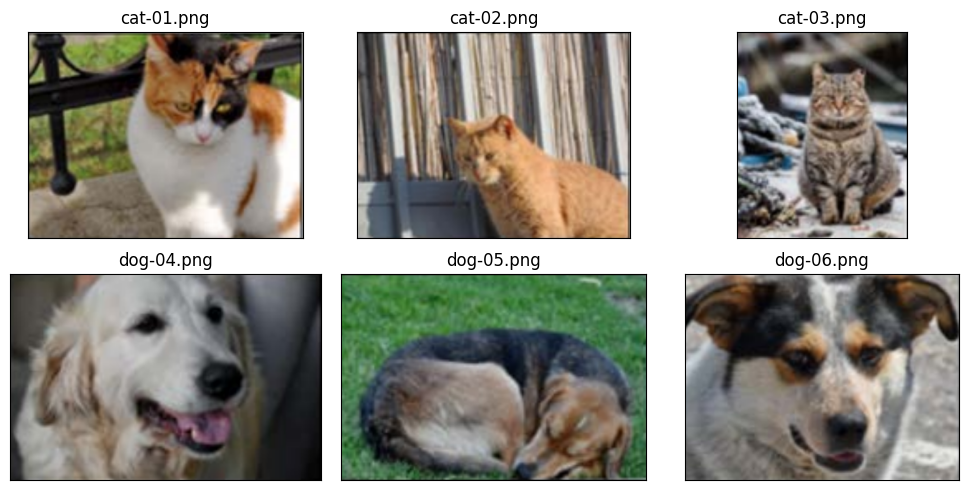

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import os

# List of image URLs from your GitHub repository
file_list = [
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/cat-01.png',
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/cat-02.png',
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/cat-03.png',
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/dog-04.png',
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/dog-05.png',
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/dog-06.png',
]

# Plot the images
fig = plt.figure(figsize=(10, 5))
for i, url in enumerate(file_list):
    # Download the image from GitHub
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    print('Image shape:', np.array(img).shape)

    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(img)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(os.path.basename(url), size=12)

plt.tight_layout()
plt.show()


In [ ]:
labels = [1 if 'dog' in
              os.path.basename(file) else 0
                      for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [ ]:
class ImageDataset(Dataset):
  def __init__(self, file_list, labels):
    self.file_list = file_list
    self.labels = labels

  def __getitem__(self, index):
    file = self.file_list[index]
    label = self.labels[index]
    return file, label

  def __len__(self):
    return len(self.labels)

image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
  print(file, label)


https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/cat-01.png 0
https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/cat-02.png 0
https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/cat-03.png 0
https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/dog-04.png 1
https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/dog-05.png 1
https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/dog-06.png 1


ed to apply transformations to this dataset: load the image content from its file path, decode the raw content, and resize it to a desired size, for example, 80×120.

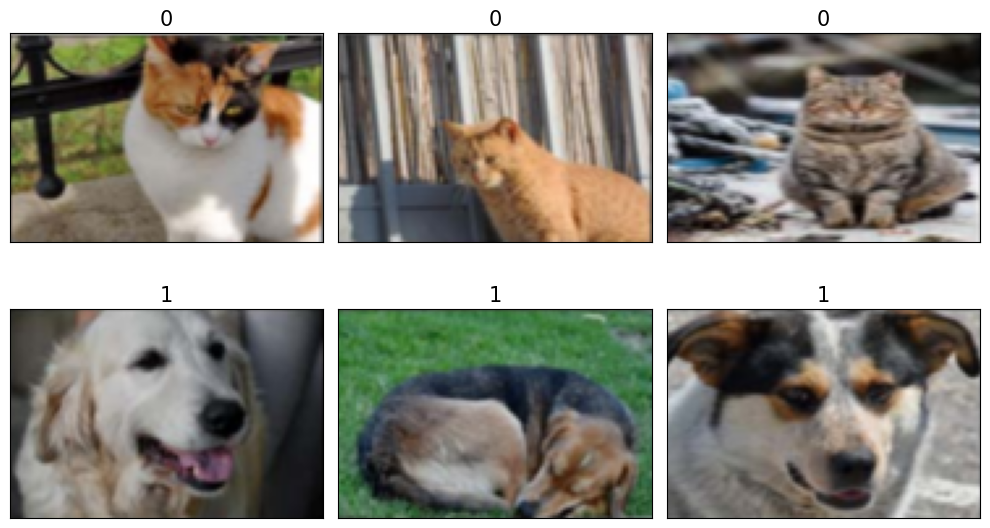

In [ ]:
import requests
from io import BytesIO
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define transform
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),  # Resize first
    transforms.ToTensor(),
])

# Updated ImageDataset to support URLs
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        url = self.file_list[index]
        # Download image from GitHub
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert("RGB")

        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label

    def __len__(self):
        return len(self.labels)

# Example GitHub URLs
file_list = [
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/cat-01.png',
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/cat-02.png',
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/cat-03.png',
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/dog-04.png',
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/dog-05.png',
    'https://github.com/mobinapourmoshir/Functional-Deep-Learning/raw/main/cat_dog_images/dog-06.png',
]

# Example labels
labels = [0, 0, 0, 1, 1, 1]  # 0 = cat, 1 = dog

# Create dataset
image_dataset = ImageDataset(file_list, labels, transform)

# Visualize
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()


(<PIL.Image.Image image mode=L size=28x28 at 0x7E9CAE70C9B0>, 5)


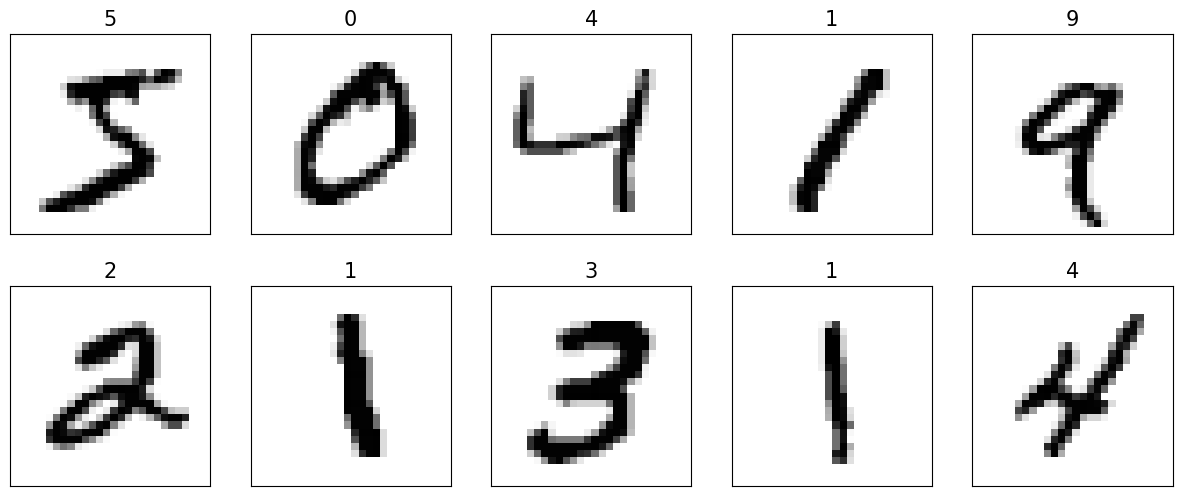

In [ ]:
import torchvision
from itertools import islice

image_path = './'
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)
assert isinstance(mnist_dataset, torch.utils.data.Dataset)
example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(image, cmap='gray_r')
  ax.set_title(f'{label}', size=15)
plt.show()

# Building an NN model in PyTorch
As PyTorch is a bit more flexible but
also more complex than machine learning libraries such as scikit-learn, we will start with a simple
linear regression model.


###The PyTorch neural network module (torch.nn)
- torch.nn module in PyTorch helps create and train neural networks efficiently.
- It supports easy prototyping and building complex models with minimal code.
- Understanding how it works is important to customize models for specific problems.
- Start by training a basic linear regression model using only PyTorch tensor operations (without torch.nn).
- Gradually add features from torch.nn and torch.optim for easier and more effective model building.
- Dataset and DataLoader functionalities provide an efficient pipeline for handling data.
- The most common approach to build neural networks is through nn.Module, which allows stacking layers and controlling the forward pass.

## Building a linear regression model


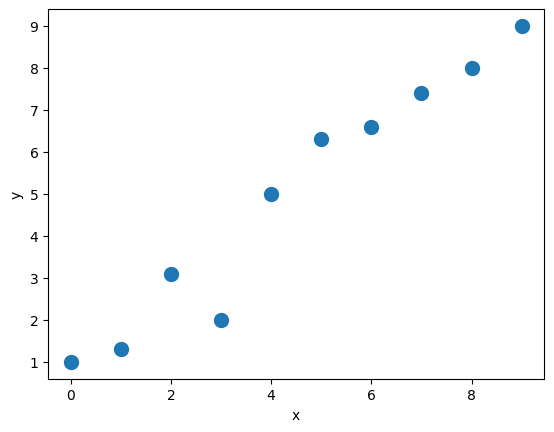

In [ ]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
                    6.3, 6.6,7.4, 8.0,
                    9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
from torch.utils.data import TensorDataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train) # Standardized
X_train_norm = torch.from_numpy(X_train_norm) # Converting it to torch
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train) # Dataser
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True) # Data Loader

In [ ]:
torch.manual_seed(1)
weight = torch.randn(1) # random weights
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True) # zero biases

# Model: Wx + b
def model(xb):
  return xb @ weight + bias
# Loss function
def loss_fn(input, target):
  return (input-target).pow(2).mean()

To implement the stochastic gradient descent algorithm, we need to compute the gradients. Rather than manually computing the gradients, we will use PyTorch's **torch.autograd.backward** function.

Now, we can set the learning rate and train the model for 200 epochs. The code for training the model against the batched version of the dataset is as follows:
1. Loop over epochs → loop over batches → compute predictions → compute loss → compute gradients.
2. Update parameters manually with gradient descent.
3. Reset gradients.
4. Log loss periodically.

In [ ]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl: # Inner loop iterates over mini-batches
    pred = model(x_batch) # forward pass (predictions)
    loss = loss_fn(pred, y_batch) # loss (error)
    loss.backward() # Computes the gradients of the loss with respect to all model parameters (weight and bias) using backpropagation.
  with torch.no_grad(): # Tells PyTorch to not track operations for autograd (we don’t want PyTorch to compute gradients for these updates)
    # gradient descent update
    weight -= weight.grad * learning_rate
    bias -= bias.grad * learning_rate
    # Resets the gradients to zero, PyTorch accumulates gradients by default, so you need to clear them after each update:
    weight.grad.zero_()
    bias.grad.zero_()
    if epoch % log_epochs==0: # Every log_epochs epochs, print the current epoch number and loss value.
      print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 46.5720
Epoch 10 Loss 27.1502
Epoch 20 Loss 1.6446
Epoch 30 Loss 14.4571
Epoch 40 Loss 11.7827
Epoch 50 Loss 6.4122
Epoch 60 Loss 0.6339
Epoch 70 Loss 3.1562
Epoch 80 Loss 2.0100
Epoch 90 Loss 0.3107
Epoch 100 Loss 0.7625
Epoch 110 Loss 1.0024
Epoch 120 Loss 0.0232
Epoch 130 Loss 0.5138
Epoch 140 Loss 0.0741
Epoch 150 Loss 1.8712
Epoch 160 Loss 0.0007
Epoch 170 Loss 0.0850
Epoch 180 Loss 0.0634
Epoch 190 Loss 0.0012


Final Parameters: 2.670930862426758 4.88258695602417


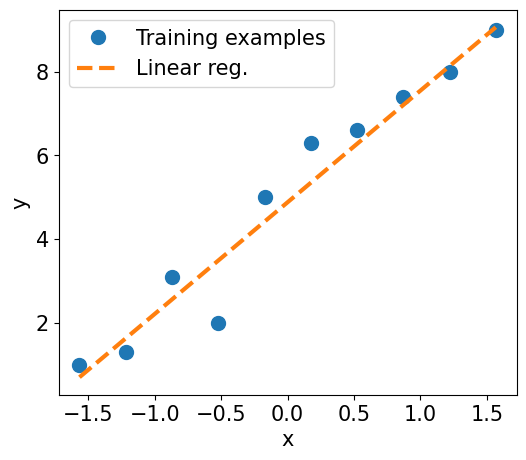

In [ ]:
# The trained model
print('Final Parameters:', weight.item(), bias.item())
# Plot
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()


## Model training via the torch.nn and torch.optim modules

The torch.nn module provides a set of loss
functions, and torch.optim supports most commonly used optimization algorithms that can be called
to update the parameters based on the computed gradients. To see how they work, let’s create a new
MSE loss function and a stochastic gradient descent optimizer:

In [ ]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size) # linear layer instead of manually defining it
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#  we can call the step() method of the optimizer to train the model by passing a batched dataset:
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    # 1. Generate predictions
    pred = model(x_batch)[:, 0]
    # 2. Calculate loss
    loss = loss_fn(pred, y_batch)
    # 3. Compute gradients
    loss.backward()
    # 4. Update parameters using gradients
    optimizer.step()
    # 5. Reset the gradients to zero
    optimizer.zero_grad()
  if epoch % log_epochs==0:
    print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 24.6684
Epoch 10 Loss 29.1377
Epoch 20 Loss 20.9207
Epoch 30 Loss 0.1257
Epoch 40 Loss 12.4922
Epoch 50 Loss 1.7845
Epoch 60 Loss 7.6425
Epoch 70 Loss 2.5606
Epoch 80 Loss 0.0157
Epoch 90 Loss 0.7548
Epoch 100 Loss 0.8412
Epoch 110 Loss 0.4923
Epoch 120 Loss 0.0823
Epoch 130 Loss 0.0794
Epoch 140 Loss 0.0891
Epoch 150 Loss 0.0973
Epoch 160 Loss 0.1043
Epoch 170 Loss 0.1103
Epoch 180 Loss 0.0009
Epoch 190 Loss 0.0764


In [ ]:
print('Final Parameters:', model.weight.item(), model.bias.item())

Final Parameters: 2.6496422290802 4.87706995010376


## Building a multilayer perceptron for classifying flowers in the Iris dataset

PyTorch provides already defined layers through torch.nn that can be readily used as the building blocks of an NN model. In this section, we will learn how to use these layers to solve a classification task using the Iris flower dataset and build a two-layer perceptron using the torch.nn module.
https://docs.pytorch.org/docs/stable/nn.html

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris['data']
y = iris['target']
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)
# Normalizing
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train) # dataset
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True) # data loader

For this problem, we are going to use the Linear layer, which is also known as a fully connected layer or dense layer, and can be best represented by f(wx + b), where x represents a tensor containing the **input features**, w and b are the **weight** matrix and the **bias** vector, and f is the **activation function**.

Here, we want to define a model with two hidden layers. The first
one receives an input of four features and projects them to 16 neurons. The second layer receives the
output of the previous layer (which has a size of 16) and projects them to three output neurons, since
we have three class labels.

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size) # Layer 1
    self.layer2 = nn.Linear(hidden_size, output_size) # Layer 2
  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x) # sigmoid activation function for the first layer
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x) # softmax activation for the last (output) layer (softmax to support multiclass classification)
    return x

input_size = X_train_norm.shape[1]
hidden_size = 16 # Number of neurons
output_size = 3
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss() #CrossEntropyLoss: Works for multi-class classification. Minimizing this loss improves the model’s predicted probabilities for the correct classes.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

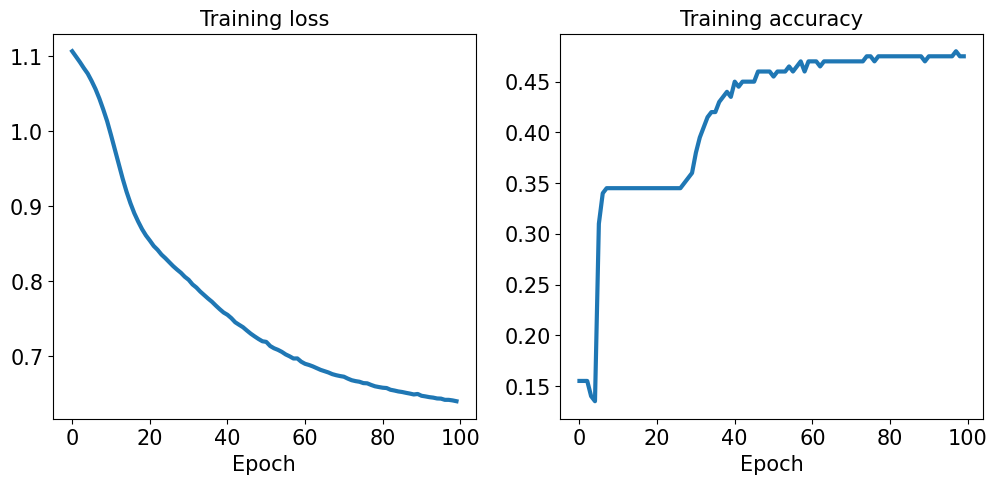

In [ ]:
# Training the model with 100 epochs
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist[epoch] += loss.item()*y_batch.size(0)
    is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
    accuracy_hist[epoch] += is_correct.mean()
  # keeping the training loss and the training accuracy after each epoch
  loss_hist[epoch] /= len(train_dl.dataset)
  accuracy_hist[epoch] /= len(train_dl.dataset)

# visualizing the learning curves
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

## Evaluating the trained model on the test dataset

In [ ]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


## Saving and reloading the trained model

Trained models can be saved on disk for future use.

In [ ]:
## saving the model
# path = 'iris_classifier.pt'
# torch.save(model, path)
# model_new = torch.load(path) # Reloading the saved model
# model_new.eval() # verifying the model architecture

import torch
import requests
from io import BytesIO

# Step 1: Download the full model from GitHub
url = "https://raw.githubusercontent.com/mobinapourmoshir/Functional-Deep-Learning/main/iris_classifier.pt"
r = requests.get(url)
model_file = BytesIO(r.content)

# Step 2: Load the model
# NOTE: The model class must be defined in the notebook before loading if saved fully
model_new = torch.load(model_file, weights_only=False)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

Finally, let’s evaluate this new model that is reloaded on the test dataset to verify that the results are
the same as before:

In [ ]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

# Choosing activation functions for multilayer neural networks

- **Sigmoid activation function** (logistic function) has been used in both hidden and output layers of multilayer feedforward NNs.  
  - Formula: $\sigma(z) = \frac{1}{1 + e^{-z}}$  
  - Often simply called “sigmoid” in machine learning literature.  

- **Activation functions** in NNs:  
  - Can technically be **any differentiable function**.  
  - Linear activation functions are possible (e.g., Adaline) but **not useful** for hidden layers, as they don’t introduce nonlinearity.  

- **Importance of nonlinearity**:  
  - Nonlinear activations allow NNs to solve **complex problems**.  
  - Linear activations in all layers reduce the network to a linear function.  

- **Sigmoid function considerations**:  
  - Mimics a neuron firing probability.  
  - Can produce outputs close to **0 for highly negative inputs**, leading to:  
    - **Slow learning**  
    - **Higher chance of getting stuck in local minima**  

- **Alternative activation functions**:  
  - **Hyperbolic tangent (tanh)** is often preferred for hidden layers because it mitigates some issues of the sigmoid.  

## Logistic function recap
  - **Logistic function** is a special case of a sigmoid function.  
  - Used to model the probability that a sample \(x\) belongs to the positive class (class 1) in **binary classification**.  

- **Net input** for a sample:  $z = w_0 x_0 + w_1 x_1 + \dots + w_m x_m = \sum_{i=0}^{m} w_i x_i = w^T x$  
  - $w_0$ is the **bias unit** $(x_0 = 1$).  

- **Logistic activation**: $\sigma_\text{logistic}(z) = \frac{1}{1 + e^{-z}}$

- **Example** (two-dimensional data point):

In [ ]:
import numpy as np
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])
def net_input(X, w):
    return np.dot(X, w)
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)
print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


- Interpretation: 88.8% probability that this sample belongs to the positive class.
- Multiclass output with multiple logistic units: Using multiple logistic activations in the output layer does not yield interpretable probabilities, because the outputs do not sum to 1.

In [ ]:
# W : array with shape = (n_output_units, n_hidden_units+1)
# note that the first column are the bias units
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])
# A : data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1
A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = 1 / (1 + np.exp(-Z))
print('Net Input:', Z)
print('Output Units:', y_probas)

Net Input: [1.78 0.76 1.65]
Output Units: [0.856 0.681 0.839]


- Predicting class labels: Even if probabilities are not meaningful, you can predict the class label by taking the index of the maximum output:

In [ ]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label:', y_class)

Predicted class label: 0


## Estimating Class Probabilities in Multiclass Classification via the Softmax Function

- **Softmax function**: a “soft” version of the argmax function.  
  - Instead of outputting a single class index, it provides **probabilities for each class**.  
  - Useful for **multiclass classification** (multinomial logistic regression).  

- **Softmax formula** for the probability of a sample belonging to class \(i\):
\[
p(z_i) = \sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{M} e^{z_j}}
\]  
  - \(M\) = number of classes  
  - Denominator ensures probabilities **sum to 1**.

In [ ]:
import numpy as np

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

# Assume Z is the net input array for each class
y_probas = softmax(Z)
print('Probabilities:\n', y_probas)
print('Sum of probabilities:', np.sum(y_probas))

Probabilities:
 [0.447 0.161 0.392]
Sum of probabilities: 1.0


- Interpretation:
  - Probabilities are normalized and meaningful.
  - Predicted class label = argmax of the probabilities (same as before with logistic outputs).

- PyTorch usage: Convert Z to a tensor and apply torch.softmax():

In [ ]:
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

- dim=0 specifies the dimension over which to normalize.
- Returns probabilities for each class for a batch of inputs.
- Key point: Softmax allows us to compute **meaningful class-membership probabilities** in multiclass settings, making it ideal for MLP output layers.

## Broadening the output spectrum using a hyperbolic tangent
- **Hyperbolic tangent (tanh)**: another sigmoidal function often used in **hidden layers** of NNs.  
  - Can be seen as a rescaled logistic function:

$$\sigma_\text{logistic}(z) = \frac{1}{1 + e^{-z}}$$  
$$\sigma_\text{tanh}(z) = 2 \cdot \sigma_\text{logistic}(2z) - 1 = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

- **Advantages of tanh over logistic**:
  - Output ranges in $(-1, 1)$, broader than logistic’s $(0, 1)$.
  - Can improve **convergence** of backpropagation.


<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3710834052.py:19: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('activation $\phi(z)$')


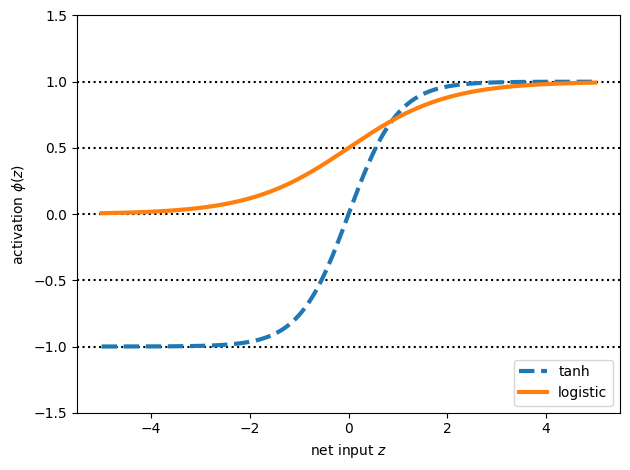

In [ ]:
# Comparison plot of logistic and tanh
import numpy as np
import matplotlib.pyplot as plt

def logistic(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act, linewidth=3, linestyle='--', label='tanh')
plt.plot(z, log_act, linewidth=3, label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

- Observations:
  - Shapes of logistic and tanh curves are similar.
  - tanh has double the output range of logistic.

- Practical implementation: Use NumPy’s built-in functions or PyTorch functions:

In [ ]:
import numpy as np
# NumPy’s built-in functions
np.set_printoptions(precision=5)
print(np.tanh(z))
# Use PyTorch functions:
print(torch.tanh(torch.from_numpy(z)))
print(torch.sigmoid(torch.from_numpy(z)))

[-0.99991 -0.99991 -0.99991 ...  0.99991  0.99991  0.99991]
tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)
tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)


In [ ]:
# logistic function is available in SciPy’s special module
from scipy.special import expit
print("expit: ", expit(z))
print("torch: ", torch.sigmoid(torch.from_numpy(z)))

expit:  [0.00669 0.00673 0.00676 ... 0.99321 0.99324 0.99327]
torch:  tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)


### Rectified Linear Unit (ReLU) Activation

- The **Rectified Linear Unit (ReLU)** is a widely used activation function in deep neural networks.  
- Before ReLU, activations like **tanh** and **logistic (sigmoid)** suffered from the **vanishing gradient problem**, where gradients become very small for large input values, slowing or stopping learning.  
- Example: if the net input changes from $ z_1 = 20 $ to $ z_2 = 25 $, both $ \tanh(z_1) = 1.0 $ and $ \tanh(z_2) = 1.0 $, showing no change in output due to saturation.  
- **ReLU** is defined as:  $\sigma(z) = \max(0, z)$
- It introduces **nonlinearity** while maintaining efficient learning because its derivative is **1 for positive inputs** and **0 for negative inputs**, helping to avoid vanishing gradients.  
- In **PyTorch**, ReLU can be applied as:

In [ ]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)

- torch.sigmoid(x) and torch.nn.Sigmoid()(x) produce equivalent results, but:
  - torch.nn.Sigmoid is a class (used as a layer object),
  - torch.sigmoid is a function (used directly).

- ReLU will be used as the activation function for multilayer convolutional neural networks (CNNs).

**An overview of the different activation functions:**

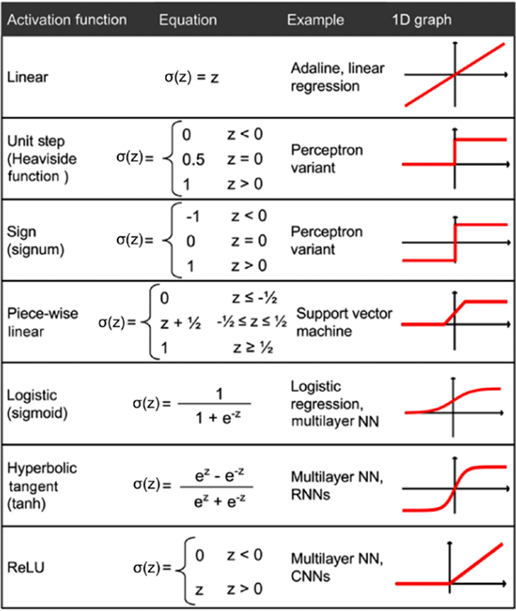